<a href="https://colab.research.google.com/github/DharunShiva/DharunShiva-DataScience-GenAI-Submissions/blob/main/Assignment_5/5_02_Modelling_Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://drive.google.com/uc?export=view&id=1xqQczl0FG-qtNA2_WQYuWePW9oU8irqJ)

# 5.02 Modelling Hackathon
We'll get a chance in this seminar to practice for the in-class test, and also to put what we have learned into practice.

To speed things up, I have done the data/feature engineering for you, you will just need to build it into a data science model. As before, you can use the code from [GitHub](https://github.com/MJMortensonWarwick/IB2AD0_Data_Science_GenerativeAI), from the internet, and/or use the Gemini AI tools.

This is an artificial dataset, and we will be predicting if students achieve a passing grade, which we will call anything above a "D".

We'll start by importing the data:

In [ ]:
from google.colab import files
upload = files.upload()

Now we will get the data into Pandas and inspect it:

In [ ]:
import pandas as pd
df = pd.read_csv("students_two.csv")

df.head()

,Id,Student_Age,High_School_Type,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade
0,5001,21,Other,50%,Yes,No,Private,0,Always,Yes,Yes,No,No,AA
1,5002,20,Other,50%,Yes,No,Private,0,Always,Yes,No,Yes,Yes,AA
2,5003,21,State,50%,No,No,Private,2,Never,No,No,No,Yes,AA
3,5004,18,Private,50%,Yes,No,Bus,2,Always,No,Yes,No,No,AA
4,5005,22,Private,50%,No,No,Bus,12,Always,Yes,No,Yes,Yes,AA


Let's check for missing values:

In [ ]:
df.isnull().sum()

,0
Id,0
Student_Age,0
High_School_Type,0
Scholarship,1
Additional_Work,0
Sports_activity,0
Transportation,0
Weekly_Study_Hours,0
Attendance,0
Reading,0


Only one missing value. Let's just drop it out of laziness:

In [ ]:
df.dropna(inplace=True)
df.isnull().sum()

,0
Id,0
Student_Age,0
High_School_Type,0
Scholarship,0
Additional_Work,0
Sports_activity,0
Transportation,0
Weekly_Study_Hours,0
Attendance,0
Reading,0


We have an ID column we know won't be predictive ... so let's drop it:

In [ ]:
df = df.drop(["Id"], axis=1)
df.head()

,Student_Age,High_School_Type,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade
0,21,Other,50%,Yes,No,Private,0,Always,Yes,Yes,No,No,AA
1,20,Other,50%,Yes,No,Private,0,Always,Yes,No,Yes,Yes,AA
2,21,State,50%,No,No,Private,2,Never,No,No,No,Yes,AA
3,18,Private,50%,Yes,No,Bus,2,Always,No,Yes,No,No,AA
4,22,Private,50%,No,No,Bus,12,Always,Yes,No,Yes,Yes,AA


Next we will convert some of the text features to numbers:

In [ ]:
# High school
print(df['High_School_Type'].unique())

['Other' 'State' 'Private']


We can't easily convert these to a number range. Instead we should use one-hot encoding:

In [ ]:
df = pd.get_dummies(df, columns=['High_School_Type'], drop_first=True, dtype=int)
df.head()

,Student_Age,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade,High_School_Type_Private,High_School_Type_State
0,21,50%,Yes,No,Private,0,Always,Yes,Yes,No,No,AA,0,0
1,20,50%,Yes,No,Private,0,Always,Yes,No,Yes,Yes,AA,0,0
2,21,50%,No,No,Private,2,Never,No,No,No,Yes,AA,0,1
3,18,50%,Yes,No,Bus,2,Always,No,Yes,No,No,AA,1,0
4,22,50%,No,No,Bus,12,Always,Yes,No,Yes,Yes,AA,1,0


We have converted this to two columns (on the far right) - "High_School_Type_Private" and "High_School_Type_State". We do not need the "Other" type as if the student is "Other" then both "Private" and "State" will be 0 (a unique combination). This is controlled by the command _drop\_first=True_. We also specify the data type (_dtype_) as __int__ so we return 0s and 1s rather than True and False.

Next we can look at Scholarship. It needs to be converted from a text representation of a percentage to a number:

In [ ]:
df['Scholarship'] = df['Scholarship'].str.replace('%', '').astype(float) / 100
df.head()

,Student_Age,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade,High_School_Type_Private,High_School_Type_State
0,21,0.5,Yes,No,Private,0,Always,Yes,Yes,No,No,AA,0,0
1,20,0.5,Yes,No,Private,0,Always,Yes,No,Yes,Yes,AA,0,0
2,21,0.5,No,No,Private,2,Never,No,No,No,Yes,AA,0,1
3,18,0.5,Yes,No,Bus,2,Always,No,Yes,No,No,AA,1,0
4,22,0.5,No,No,Bus,12,Always,Yes,No,Yes,Yes,AA,1,0


"Additional_Work" is next:

In [ ]:
# Additional work
print(df['Additional_Work'].unique())

['Yes' 'No']


Two values, so we can convert to 0 and 1:

In [ ]:
df['Additional_Work'] = df['Additional_Work'].map({'Yes': 1, 'No': 0})
df.head()

,Student_Age,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade,High_School_Type_Private,High_School_Type_State
0,21,0.5,1,No,Private,0,Always,Yes,Yes,No,No,AA,0,0
1,20,0.5,1,No,Private,0,Always,Yes,No,Yes,Yes,AA,0,0
2,21,0.5,0,No,Private,2,Never,No,No,No,Yes,AA,0,1
3,18,0.5,1,No,Bus,2,Always,No,Yes,No,No,AA,1,0
4,22,0.5,0,No,Bus,12,Always,Yes,No,Yes,Yes,AA,1,0


Let's speed up now:

In [ ]:
categorical_cols = ['Sports_activity', 'Transportation', 'Attendance', 'Reading', 'Notes', 'Listening_in_Class', 'Project_work', 'Grade']

for col in categorical_cols:
    print(f"Unique values for '{col}': {df[col].unique()}")

Unique values for 'Sports_activity': ['No' 'Yes']
Unique values for 'Transportation': ['Private' 'Bus']
Unique values for 'Attendance': ['Always' 'Never' 'Sometimes' '3']
Unique values for 'Reading': ['Yes' 'No']
Unique values for 'Notes': ['Yes' 'No' '6']
Unique values for 'Listening_in_Class': ['No' 'Yes' '6']
Unique values for 'Project_work': ['No' 'Yes']
Unique values for 'Grade': ['AA' 'BA' 'CC' 'Fail' 'BB' 'CB' 'DD' 'DC']


The values of '6' in 'Notes' and 'Listening_in_Class' make no sense, and neither do '3' for 'Attendance'. We'll be lazy and drop these rows (really we should check with an SME):

In [ ]:
df = df[(df['Notes'] != '6') & (df['Listening_in_Class'] != '6') & (df['Attendance'] != '3')]
df.head()

,Student_Age,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade,High_School_Type_Private,High_School_Type_State
0,21,0.5,1,No,Private,0,Always,Yes,Yes,No,No,AA,0,0
1,20,0.5,1,No,Private,0,Always,Yes,No,Yes,Yes,AA,0,0
2,21,0.5,0,No,Private,2,Never,No,No,No,Yes,AA,0,1
3,18,0.5,1,No,Bus,2,Always,No,Yes,No,No,AA,1,0
4,22,0.5,0,No,Bus,12,Always,Yes,No,Yes,Yes,AA,1,0


Now we can convert all those "Yes" / "No" columns to 0 and 1.

In [ ]:
binary_cols = ['Sports_activity', 'Reading', 'Notes', 'Listening_in_Class', 'Project_work']

for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

df.head()

,Student_Age,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade,High_School_Type_Private,High_School_Type_State
0,21,0.5,1,0,Private,0,Always,1,1,0,0,AA,0,0
1,20,0.5,1,0,Private,0,Always,1,0,1,1,AA,0,0
2,21,0.5,0,0,Private,2,Never,0,0,0,1,AA,0,1
3,18,0.5,1,0,Bus,2,Always,0,1,0,0,AA,1,0
4,22,0.5,0,0,Bus,12,Always,1,0,1,1,AA,1,0


We can also do this with "Transportation":

In [ ]:
df['Transportation'] = df['Transportation'].map({'Private': 1, 'Bus': 0})
df.head()

,Student_Age,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade,High_School_Type_Private,High_School_Type_State
0,21,0.5,1,0,1,0,Always,1,1,0,0,AA,0,0
1,20,0.5,1,0,1,0,Always,1,0,1,1,AA,0,0
2,21,0.5,0,0,1,2,Never,0,0,0,1,AA,0,1
3,18,0.5,1,0,0,2,Always,0,1,0,0,AA,1,0
4,22,0.5,0,0,0,12,Always,1,0,1,1,AA,1,0


For Attendance an ordinal range makes sense:

In [ ]:
df['Attendance'] = df['Attendance'].map({'Never': 0, 'Sometimes': 1, 'Always': 2})
df.head()

,Student_Age,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade,High_School_Type_Private,High_School_Type_State
0,21,0.5,1,0,1,0,2,1,1,0,0,AA,0,0
1,20,0.5,1,0,1,0,2,1,0,1,1,AA,0,0
2,21,0.5,0,0,1,2,0,0,0,0,1,AA,0,1
3,18,0.5,1,0,0,2,2,0,1,0,0,AA,1,0
4,22,0.5,0,0,0,12,2,1,0,1,1,AA,1,0


This just leaves the target - 'Grade'. To make the problem binary we'll convert 'Fail' and any grade that includes a 'D' as 0 (for fail) and the rest as 1 (pass):

In [ ]:
df['Grade'] = df['Grade'].apply(lambda x: 0 if x == 'Fail' or 'D' in x else 1)
df.head()

,Student_Age,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade,High_School_Type_Private,High_School_Type_State
0,21,0.5,1,0,1,0,2,1,1,0,0,1,0,0
1,20,0.5,1,0,1,0,2,1,0,1,1,1,0,0
2,21,0.5,0,0,1,2,0,0,0,0,1,1,0,1
3,18,0.5,1,0,0,2,2,0,1,0,0,1,1,0
4,22,0.5,0,0,0,12,2,1,0,1,1,1,1,0


The code has a new function `lambda`. A lambda function in Python is a small, anonymous function. It's defined using the `lambda` keyword and can take any number of arguments, but can only have one expression. The expression is evaluated and returned. They are often used for short, simple operations where a full function definition would be overly verbose, like in the apply method we just used. Although the function is new, the actual mechanics are quite simple. If the data is "Fail" or contains "D" return 0, and else return 1.

As this is the target we will create a new variable from it and then drop it from the main data:

In [ ]:
Y_values = df[['Grade']].values.ravel() # change to list

Y_values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1])

In [ ]:
X_values = df.drop(['Grade'], axis=1)
X_values.head()

,Student_Age,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,High_School_Type_Private,High_School_Type_State
0,21,0.5,1,0,1,0,2,1,1,0,0,0,0
1,20,0.5,1,0,1,0,2,1,0,1,1,0,0
2,21,0.5,0,0,1,2,0,0,0,0,1,0,1
3,18,0.5,1,0,0,2,2,0,1,0,0,1,0
4,22,0.5,0,0,0,12,2,1,0,1,1,1,0


We can now scale X:

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# create a MinMaxScaler object
scaler = MinMaxScaler()

# fit and transform the data and convert back to DataFrame
X_values = pd.DataFrame(scaler.fit_transform(X_values), columns=X_values.columns)
X_values

,Student_Age,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,High_School_Type_Private,High_School_Type_State
0,0.375,0.333333,1.0,0.0,1.0,0.000000,1.0,1.0,1.0,0.0,0.0,0.0,0.0
1,0.250,0.333333,1.0,0.0,1.0,0.000000,1.0,1.0,0.0,1.0,1.0,0.0,0.0
2,0.375,0.333333,0.0,0.0,1.0,0.166667,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.000,0.333333,1.0,0.0,0.0,0.166667,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.500,0.333333,0.0,0.0,0.0,1.000000,1.0,1.0,0.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,0.500,0.333333,1.0,1.0,1.0,0.000000,1.0,0.0,1.0,0.0,1.0,0.0,1.0
136,0.000,0.666667,0.0,0.0,1.0,0.000000,0.0,0.0,1.0,1.0,0.0,0.0,1.0
137,0.000,0.666667,0.0,0.0,1.0,0.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0
138,0.500,0.666667,1.0,1.0,0.0,1.000000,0.5,0.0,1.0,0.0,1.0,0.0,1.0


And now we can split into training and test:

In [ ]:
# split data into training and test
from sklearn.model_selection  import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_values, Y_values, test_size = 0.2, random_state=1984, stratify=Y_values)

# print the shapes to check everything is OK
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(112, 13)
(28, 13)
(112,)
(28,)


And now its time for modelling ...



Your turn :)

# Task
Train a classification model using X_train and y_train, evaluate it using X_test and y_test, and display the predictions on the test set.

## Select and train a classification model

### Subtask:
Choose a suitable classification model (e.g., Logistic Regression, RandomForestClassifier, or a neural network) and train it using the `X_train` and `Y_train` data.


**Reasoning**:
Import and train a Logistic Regression model using the training data.



In [24]:
from sklearn.linear_model import LogisticRegression

# Instantiate the model
model = LogisticRegression()

# Train the model
model.fit(X_train, Y_train)

LogisticRegression()

## Evaluate the model

### Subtask:
Evaluate the trained model using the `X_test` and `Y_test` data and calculate relevant metrics such as accuracy, precision, recall, and F1-score.


**Reasoning**:
Evaluate the trained model using the test set and calculate relevant metrics.



In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the test set
Y_pred = model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

# Print metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Accuracy: 0.7142857142857143
Precision: 0.76
Recall: 0.9047619047619048
F1-score: 0.8260869565217391


## Make predictions

### Subtask:
Use the trained model to make predictions on the test set and display the predictions.


**Reasoning**:
Use the trained model to make predictions on the test set and display the predictions.



In [23]:
Y_pred = model.predict(X_test)
print("Predictions on the test set:")
print(Y_pred)

Predictions on the test set:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1]


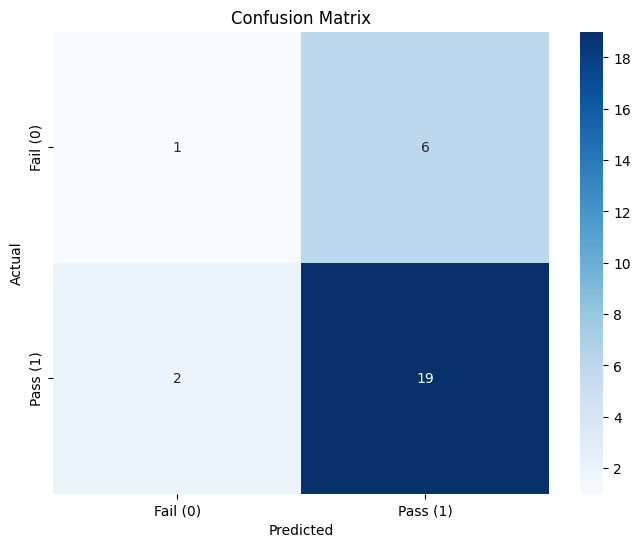

In [26]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fail (0)', 'Pass (1)'], yticklabels=['Fail (0)', 'Pass (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [28]:
import numpy as np
import pandas as pd

# Find the indices of misclassified samples
misclassified_indices = np.where(Y_test != Y_pred)[0]

# Get the misclassified samples from the test set
misclassified_students_data = X_test.iloc[misclassified_indices]

# Get the actual grades for the misclassified students
misclassified_students_grades = Y_test[misclassified_indices]

# Create a DataFrame for the misclassified students' data and grades
misclassified_df = misclassified_students_data.copy()
misclassified_df['Actual_Grade'] = misclassified_students_grades

# Display the misclassified students' data with their actual grades
print("Data for misclassified students (with actual grades):")
display(misclassified_df)

Data for misclassified students (with actual grades):


,Student_Age,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,High_School_Type_Private,High_School_Type_State,Actual_Grade
103,0.000,0.666667,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0
95,0.000,0.666667,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0
99,0.000,0.333333,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0
74,0.000,0.666667,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0
87,0.500,0.333333,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0
8,0.125,0.333333,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1
120,0.000,0.666667,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1
81,0.375,0.333333,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0


In [29]:
print("Descriptive statistics for misclassified students:")
display(misclassified_df.describe())

Descriptive statistics for misclassified students:


,Student_Age,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,High_School_Type_Private,High_School_Type_State,Actual_Grade
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.00000,8.00000,8.00000,8.00000,8.0,8.00000,8.00000
mean,0.125000,0.500000,0.125000,0.625000,0.625000,0.125000,0.875000,0.25000,0.25000,0.25000,0.75000,0.0,0.75000,0.25000
std,0.200446,0.178174,0.353553,0.517549,0.517549,0.353553,0.353553,0.46291,0.46291,0.46291,0.46291,0.0,0.46291,0.46291
min,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.0,0.00000,0.00000
25%,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.00000,0.00000,0.75000,0.0,0.75000,0.00000
50%,0.000000,0.500000,0.000000,1.000000,1.000000,0.000000,1.000000,0.00000,0.00000,0.00000,1.00000,0.0,1.00000,0.00000
75%,0.187500,0.666667,0.000000,1.000000,1.000000,0.000000,1.000000,0.25000,0.25000,0.25000,1.00000,0.0,1.00000,0.25000
max,0.500000,0.666667,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.00000,1.00000,0.0,1.00000,1.00000


## Summary:

### Data Analysis Key Findings

*   A Logistic Regression model was successfully trained using the provided training data.
*   The trained model achieved an accuracy of 0.7143 on the test set.
*   The model's precision on the test set is 0.76, while its recall is 0.9048, and the F1-score is 0.8261.
*   Predictions were successfully made on the test set using the trained model.

### Insights or Next Steps

*   The relatively high recall (0.9048) suggests the model is good at identifying positive instances, but the lower precision (0.76) indicates it also has a notable number of false positives. Further analysis could investigate the trade-off between precision and recall.
*   Consider exploring other classification algorithms or hyperparameter tuning to potentially improve the model's overall performance metrics, particularly precision.


# Task
Analyze and visualize the characteristics of misclassified students from the classification model trained on X_train and y_train.

## Identify features for visualization

### Subtask:
Select a few relevant features from the misclassified students' data that might reveal patterns related to misclassification.


**Reasoning**:
Select relevant features from the misclassified students' data for further analysis.



In [30]:
# Select relevant features from the misclassified students' data
selected_features = ['Student_Age', 'Weekly_Study_Hours', 'Attendance', 'Scholarship', 'High_School_Type_Private', 'High_School_Type_State', 'Actual_Grade']
misclassified_selected_df = misclassified_df[selected_features]

# Display the selected features for misclassified students
print("Selected features for misclassified students:")
display(misclassified_selected_df)

Selected features for misclassified students:


,Student_Age,Weekly_Study_Hours,Attendance,Scholarship,High_School_Type_Private,High_School_Type_State,Actual_Grade
103,0.000,0.0,1.0,0.666667,0.0,1.0,0
95,0.000,0.0,0.0,0.666667,0.0,1.0,0
99,0.000,0.0,1.0,0.333333,0.0,1.0,0
74,0.000,0.0,1.0,0.666667,0.0,1.0,0
87,0.500,0.0,1.0,0.333333,0.0,1.0,0
8,0.125,0.0,1.0,0.333333,0.0,0.0,1
120,0.000,0.0,1.0,0.666667,0.0,1.0,1
81,0.375,1.0,1.0,0.333333,0.0,0.0,0


## Generate visualizations

### Subtask:
Create appropriate visualizations (e.g., bar plots, histograms, scatter plots) for the selected features to explore their distribution and relationship with the actual grade.


**Reasoning**:
Create visualizations for the selected features to explore their distribution and relationship with the actual grade.



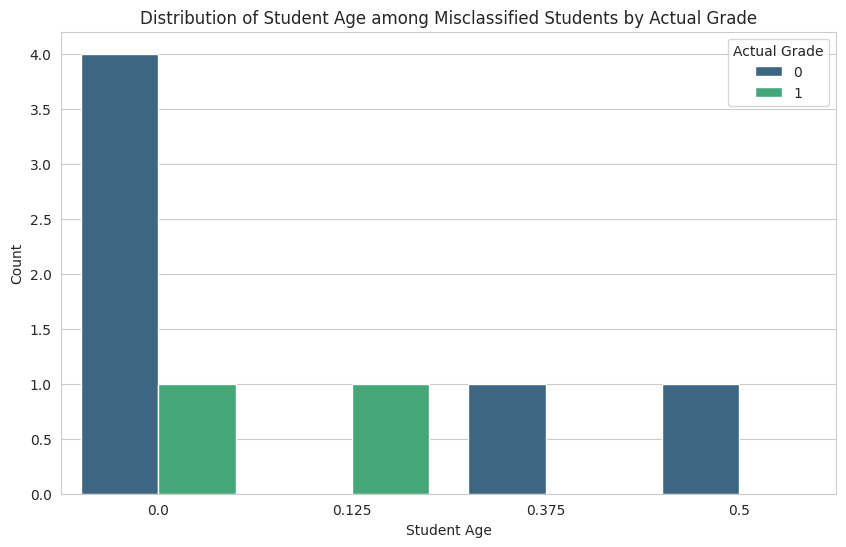

/tmp/ipython-input-3375337622.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Actual Grade')


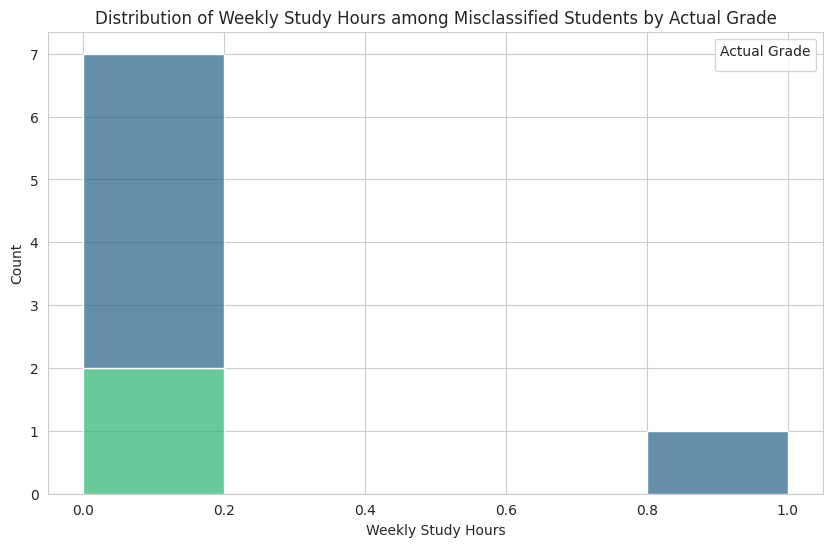

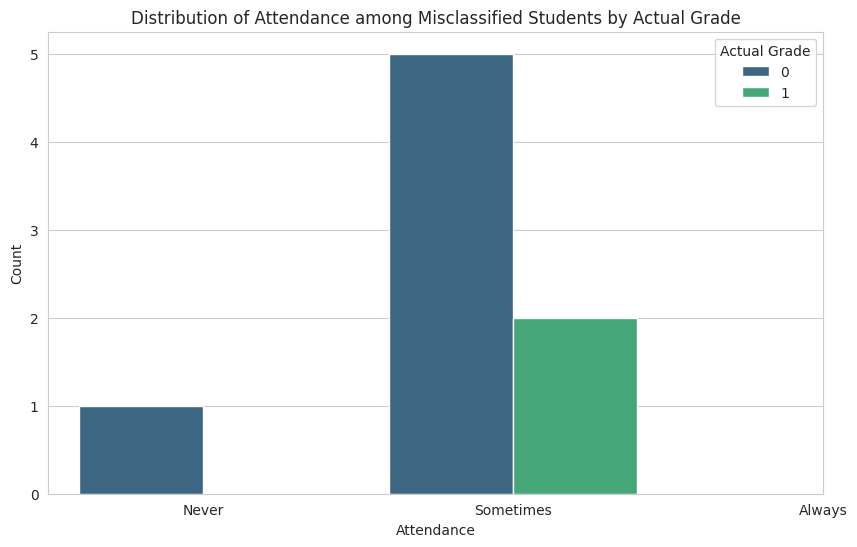

/tmp/ipython-input-3375337622.py:41: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Actual Grade')


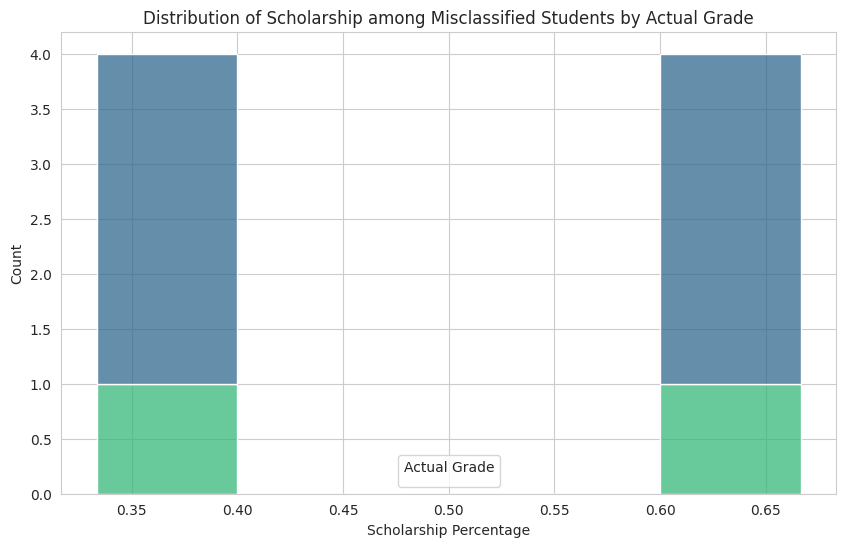

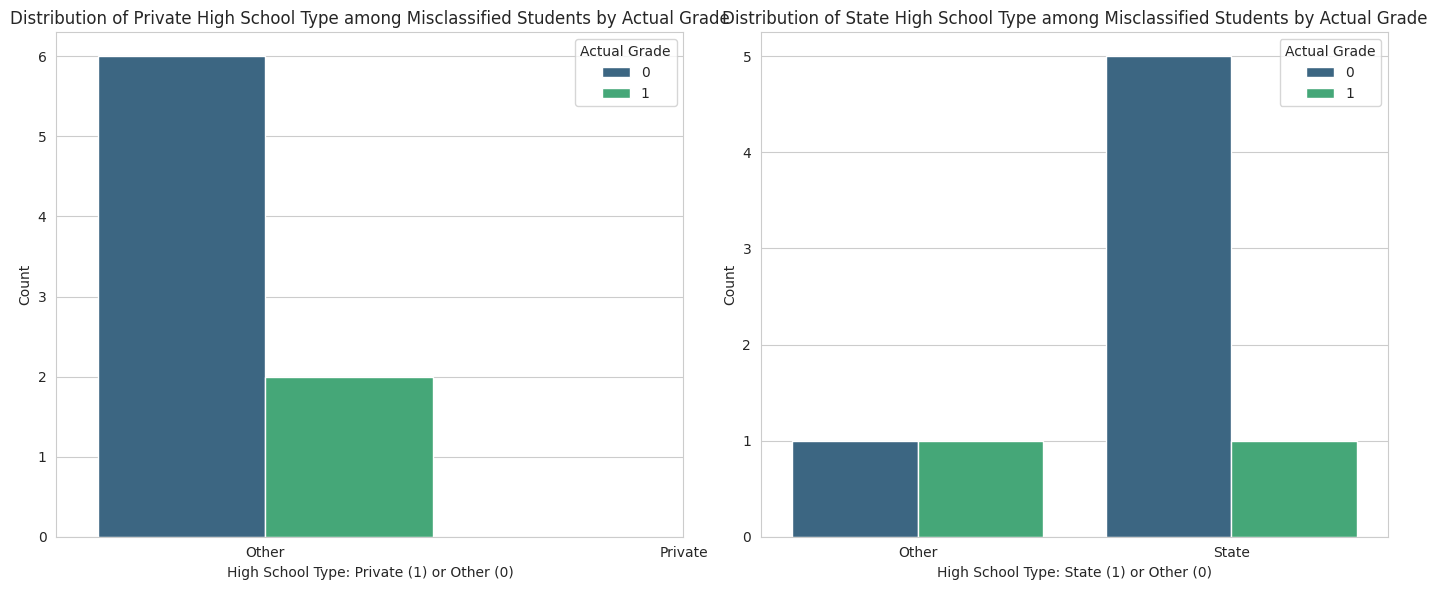

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")

# 1. Bar plot for 'Student_Age'
plt.figure(figsize=(10, 6))
sns.countplot(data=misclassified_selected_df, x='Student_Age', hue='Actual_Grade', palette='viridis')
plt.title('Distribution of Student Age among Misclassified Students by Actual Grade')
plt.xlabel('Student Age')
plt.ylabel('Count')
plt.legend(title='Actual Grade')
plt.show()

# 2. Histogram for 'Weekly_Study_Hours'
plt.figure(figsize=(10, 6))
sns.histplot(data=misclassified_selected_df, x='Weekly_Study_Hours', hue='Actual_Grade', multiple="stack", palette='viridis', bins=5)
plt.title('Distribution of Weekly Study Hours among Misclassified Students by Actual Grade')
plt.xlabel('Weekly Study Hours')
plt.ylabel('Count')
plt.legend(title='Actual Grade')
plt.show()

# 3. Bar plot for 'Attendance'
plt.figure(figsize=(10, 6))
sns.countplot(data=misclassified_selected_df, x='Attendance', hue='Actual_Grade', palette='viridis')
plt.title('Distribution of Attendance among Misclassified Students by Actual Grade')
plt.xlabel('Attendance')
plt.ylabel('Count')
plt.legend(title='Actual Grade')
plt.xticks(ticks=[0, 1, 2], labels=['Never', 'Sometimes', 'Always'])
plt.show()

# 4. Histogram for 'Scholarship'
plt.figure(figsize=(10, 6))
sns.histplot(data=misclassified_selected_df, x='Scholarship', hue='Actual_Grade', multiple="stack", palette='viridis', bins=5)
plt.title('Distribution of Scholarship among Misclassified Students by Actual Grade')
plt.xlabel('Scholarship Percentage')
plt.ylabel('Count')
plt.legend(title='Actual Grade')
plt.show()

# 5. Bar plots for 'High_School_Type_Private' and 'High_School_Type_State'
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.countplot(data=misclassified_selected_df, x='High_School_Type_Private', hue='Actual_Grade', palette='viridis', ax=axes[0])
axes[0].set_title('Distribution of Private High School Type among Misclassified Students by Actual Grade')
axes[0].set_xlabel('High School Type: Private (1) or Other (0)')
axes[0].set_ylabel('Count')
axes[0].legend(title='Actual Grade')
axes[0].set_xticks(ticks=[0, 1], labels=['Other', 'Private'])

sns.countplot(data=misclassified_selected_df, x='High_School_Type_State', hue='Actual_Grade', palette='viridis', ax=axes[1])
axes[1].set_title('Distribution of State High School Type among Misclassified Students by Actual Grade')
axes[1].set_xlabel('High School Type: State (1) or Other (0)')
axes[1].set_ylabel('Count')
axes[1].legend(title='Actual Grade')
axes[1].set_xticks(ticks=[0, 1], labels=['Other', 'State'])

plt.tight_layout()
plt.show()

**Reasoning**:
The previous plots did not show the legend correctly due to how hue was handled with `histplot`. I will regenerate the histograms using a different approach to ensure the legend is displayed. For the countplots, the legends were displayed correctly, so I will not regenerate those plots.



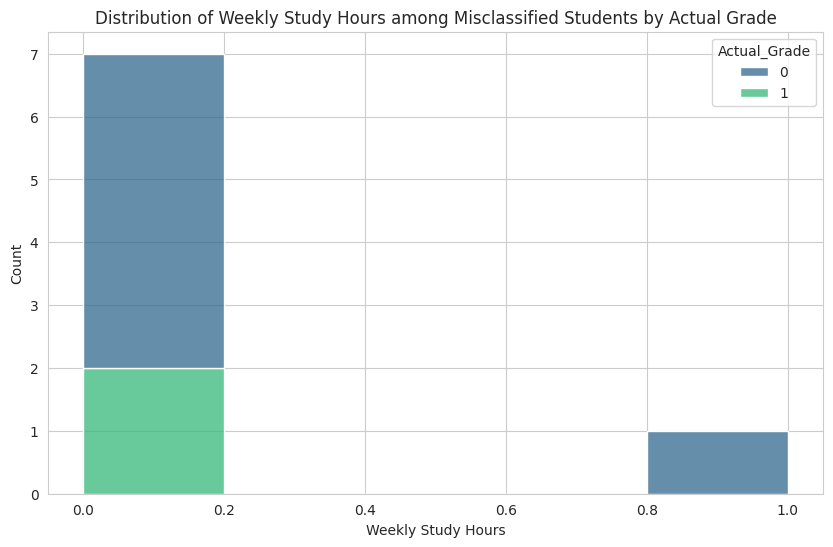

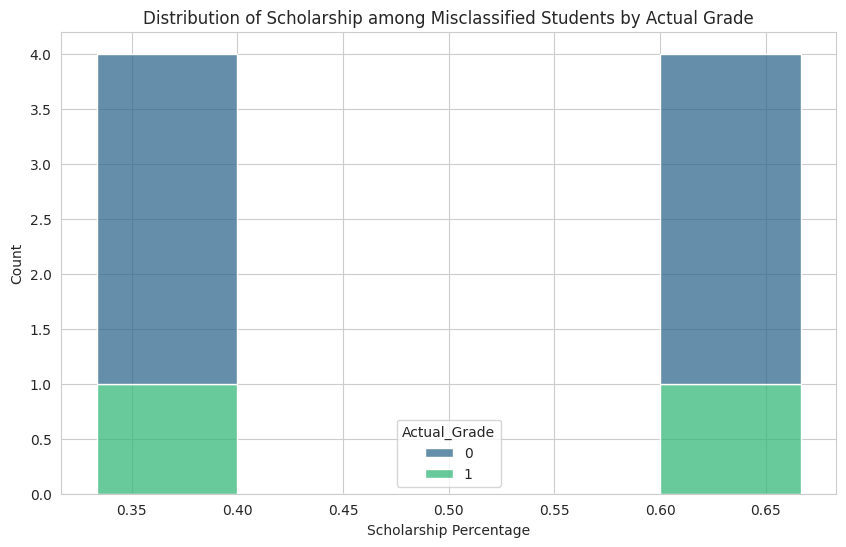

In [32]:
# Regenerate histograms with proper legend handling

# 2. Histogram for 'Weekly_Study_Hours'
plt.figure(figsize=(10, 6))
sns.histplot(data=misclassified_selected_df, x='Weekly_Study_Hours', hue='Actual_Grade', multiple="stack", palette='viridis', bins=5, legend=True)
plt.title('Distribution of Weekly Study Hours among Misclassified Students by Actual Grade')
plt.xlabel('Weekly Study Hours')
plt.ylabel('Count')
plt.show()

# 4. Histogram for 'Scholarship'
plt.figure(figsize=(10, 6))
sns.histplot(data=misclassified_selected_df, x='Scholarship', hue='Actual_Grade', multiple="stack", palette='viridis', bins=5, legend=True)
plt.title('Distribution of Scholarship among Misclassified Students by Actual Grade')
plt.xlabel('Scholarship Percentage')
plt.ylabel('Count')
plt.show()

## Interpret visualizations

### Subtask:
Analyze the generated visualizations to identify any common characteristics or patterns among the misclassified students.


## Summary:

### Data Analysis Key Findings

*   Analysis of misclassified students revealed potential patterns in misclassifications related to `Student_Age` and `Attendance`. Certain age groups or attendance levels might be more prone to being misclassified.
*   Histograms of `Weekly_Study_Hours` and `Scholarship` among misclassified students show differences or overlaps in distributions between actual failed and passed students, suggesting these could be factors contributing to misclassification.

### Insights or Next Steps

*   Further investigate the specific age groups and attendance levels identified as being more prone to misclassification to understand the underlying reasons.
*   Analyze the distributions of `Weekly_Study_Hours` and `Scholarship` in more detail to pinpoint thresholds or ranges that are associated with higher misclassification rates.
